In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
import matplotlib.pyplot as plt
from scipy import stats
from viewser.operations import fetch
from viewser import Queryset, Column
import subprocess


In [39]:
from MonthToAnnual import MonthToAnnualRegression

In [40]:
!viewser tables show ged2_cm



  > Ged2_cm
  -------------------------------------------------------
  | name                    | path                    |
  |:------------------------|:------------------------|
  | country_month_id        | country_month_id        |
  | ged_sb_best_sum_nokgi   | ged_sb_best_sum_nokgi   |
  | ged_ns_best_sum_nokgi   | ged_ns_best_sum_nokgi   |
  | ged_os_best_sum_nokgi   | ged_os_best_sum_nokgi   |
  | ged_sb_best_count_nokgi | ged_sb_best_count_nokgi |
  | ged_ns_best_count_nokgi | ged_ns_best_count_nokgi |
  | ged_os_best_count_nokgi | ged_os_best_count_nokgi |
  | ged_sb_high_sum_nokgi   | ged_sb_high_sum_nokgi   |
  | ged_ns_high_sum_nokgi   | ged_ns_high_sum_nokgi   |
  | ged_os_high_sum_nokgi   | ged_os_high_sum_nokgi   |
  | ged_sb_high_count_nokgi | ged_sb_high_count_nokgi |
  | ged_ns_high_count_nokgi | ged_ns_high_count_nokgi |
  | ged_os_high_count_nokgi | ged_os_high_count_nokgi |
  | test                    | test                    |
  
  ----------------------------

num_lags = 36

queryset = (Queryset('month_to_annual','country_month'))

queryset = queryset.with_column(
    Column('ged_sb_nolag', from_table="ged2_cm", from_column="ged_sb_best_sum_nokgi")
    .transform.missing.replace_na()
    .transform.ops.ln()
    .transform.missing.replace_na()
)
for lag in range(1, num_lags + 1):
    tlag_variable_name = f"ged_sb_tlag{lag}"
    # Apply the tlag transformation
    queryset = queryset.with_column(
        Column(tlag_variable_name, from_table="ged2_cm", from_column="ged_sb_best_sum_nokgi")
        .transform.missing.replace_na()
        .transform.ops.ln()
        .transform.temporal.tlag(lag)
        .transform.missing.replace_na()
    )

queryset = queryset.with_column(
    Column('wdi_sh_dyn_mort_fe', from_table="wdi_cy", from_column="wdi_sh_dyn_mort_fe")
    .transform.missing.fill()
    .transform.ops.ln()
    .transform.missing.replace_na()

)

queryset = queryset.with_column(
    Column('wdi_ny_gdp_mktp_kd', from_table="wdi_cy", from_column="wdi_ny_gdp_mktp_kd")
    .transform.missing.fill()
    .transform.ops.ln()
    .transform.missing.replace_na()

)

queryset = queryset.with_column(
    Column('wdi_sp_pop_totl', from_table="wdi_cy", from_column="wdi_sp_pop_totl")
    .transform.missing.fill()
    .transform.ops.ln()
    .transform.missing.replace_na()

)

queryset = queryset.with_column(
    Column('country_name', from_table="country", from_column="name")

)


    
df = queryset.publish().fetch()

In [41]:
df = Queryset("month_to_annual", "country_month").fetch()

 .    

In [42]:
df

country_name  ged_sb_nolag  wdi_sh_dyn_mort_fe  \
month_id country_id                                                          
1        1                        Guyana           0.0            4.151040   
         2                      Suriname           0.0            3.953165   
         3           Trinidad and Tobago           0.0            3.616309   
         4                     Venezuela           0.0            3.711130   
         5                         Samoa           0.0            3.718438   
...                                  ...           ...                 ...   
852      242                    Tanzania           0.0            3.793239   
         243                     Morocco           0.0            2.844909   
         244                  Mauritania           0.0            3.616309   
         245                       Sudan           0.0            3.927896   
         246                 South Sudan           0.0            4.552824   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
1        1                    21.645497        13.564709           0.0   
         2                    21.704949        12.834983           0.0   
         3                    22.994549        13.935826           0.0   
         4                     0.000000        16.537493           0.0   
         5                    19.784920        12.013131           0.0   
...                                 ...              ...           ...   
852      242                  24.884573        17.967941           0.0   
         243                  25.542467        17.428496           0.0   
         244                  22.728763        15.344817           0.0   
         245                  25.101865        17.636672           0.0   
         246                  23.207989        16.190256           0.0   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
1        1                    0.0           0.0           0.0           0.0   
         2                    0.0           0.0           0.0           0.0   
         3                    0.0           0.0           0.0           0.0   
         4                    0.0           0.0           0.0           0.0   
         5                    0.0           0.0           0.0           0.0   
...                           ...           ...           ...           ...   
852      242                  0.0           0.0           0.0           0.0   
         243                  0.0           0.0           0.0           0.0   
         244                  0.0           0.0           0.0           0.0   
         245                  0.0           0.0           0.0           0.0   
         246                  0.0           0.0           0.0           0.0   

                     ...  ged_sb_tlag27  ged_sb_tlag28  ged_sb_tlag29  \
month_id country_id  ...                                                
1        1           ...            0.0            0.0            0.0   
         2           ...            0.0            0.0            0.0   
         3           ...            0.0            0.0            0.0   
         4           ...            0.0            0.0            0.0   
         5           ...            0.0            0.0            0.0   
...                  ...            ...            ...            ...   
852      242         ...            0.0            0.0            0.0   
         243         ...            0.0            0.0            0.0   
         244         ...            0.0            0.0            0.0   
         245         ...            0.0            0.0            0.0   
         246         ...            0.0            0.0            0.0   

                     ged_sb_tlag30  ged_sb_tlag31  ged_sb_tlag32  \
mont

In [6]:
df.query('country_id == 28')

,,country_name,wdi_sh_dyn_mort_fe,wdi_ny_gdp_mktp_kd,wdi_sp_pop_totl,ged_sb_tlag1,ged_sb_tlag2,ged_sb_tlag3,ged_sb_tlag4,ged_sb_tlag5,ged_sb_tlag6,...,ged_sb_tlag27,ged_sb_tlag28,ged_sb_tlag29,ged_sb_tlag30,ged_sb_tlag31,ged_sb_tlag32,ged_sb_tlag33,ged_sb_tlag34,ged_sb_tlag35,ged_sb_tlag36
month_id,country_id,,,,,,,,,,,,,,,,,,,,,
1,28,Colombia,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28,Colombia,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,Colombia,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,Colombia,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,28,Colombia,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,28,Colombia,2.525729,26.524291,17.757414,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
849,28,Colombia,2.525729,26.524291,17.757414,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
850,28,Colombia,2.525729,26.524291,17.757414,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
j = 0
for i in range(1,247,1):
    count = MonthToAnnualRegression.countries_with_missing_data(df,i)
    if count != 852 :
        print(i, count)
        j=j+1
print('Number of countries with missing data is ',j)

15 0
27 832
35 830
36 808
44 0
51 0
56 692
57 692
59 379
61 0
63 709
65 709
68 0
71 0
72 0
75 0
83 705
84 705
86 710
88 0
91 0
92 712
95 0
98 696
102 696
103 705
106 0
110 713
111 712
113 712
114 712
115 713
117 709
122 711
123 713
124 607
125 709
126 709
131 607
134 713
137 712
140 804
141 0
144 675
152 771
153 770
163 730
170 730
175 0
176 584
182 847
184 723
185 130
186 130
187 156
188 143
189 140
190 0
191 161
192 123
193 0
194 0
195 0
196 125
197 125
200 0
201 0
202 0
203 0
204 0
207 0
208 269
209 584
210 0
211 0
212 0
215 0
216 0
217 0
219 0
221 0
224 0
225 0
226 0
227 171
228 0
229 0
230 21
231 535
232 514
233 514
236 193
238 0
239 246
240 122
241 0
242 659
245 474
246 474
Number of countries with missing data is  99


In [43]:
fixed_effect_column = 'country_id'
df[fixed_effect_column] = df.index.get_level_values(fixed_effect_column)
fixed_effect_column = 'month_id'
df[fixed_effect_column] = df.index.get_level_values(fixed_effect_column)

In [44]:
df

country_name  ged_sb_nolag  wdi_sh_dyn_mort_fe  \
month_id country_id                                                          
1        1                        Guyana           0.0            4.151040   
         2                      Suriname           0.0            3.953165   
         3           Trinidad and Tobago           0.0            3.616309   
         4                     Venezuela           0.0            3.711130   
         5                         Samoa           0.0            3.718438   
...                                  ...           ...                 ...   
852      242                    Tanzania           0.0            3.793239   
         243                     Morocco           0.0            2.844909   
         244                  Mauritania           0.0            3.616309   
         245                       Sudan           0.0            3.927896   
         246                 South Sudan           0.0            4.552824   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
1        1                    21.645497        13.564709           0.0   
         2                    21.704949        12.834983           0.0   
         3                    22.994549        13.935826           0.0   
         4                     0.000000        16.537493           0.0   
         5                    19.784920        12.013131           0.0   
...                                 ...              ...           ...   
852      242                  24.884573        17.967941           0.0   
         243                  25.542467        17.428496           0.0   
         244                  22.728763        15.344817           0.0   
         245                  25.101865        17.636672           0.0   
         246                  23.207989        16.190256           0.0   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
1        1                    0.0           0.0           0.0           0.0   
         2                    0.0           0.0           0.0           0.0   
         3                    0.0           0.0           0.0           0.0   
         4                    0.0           0.0           0.0           0.0   
         5                    0.0           0.0           0.0           0.0   
...                           ...           ...           ...           ...   
852      242                  0.0           0.0           0.0           0.0   
         243                  0.0           0.0           0.0           0.0   
         244                  0.0           0.0           0.0           0.0   
         245                  0.0           0.0           0.0           0.0   
         246                  0.0           0.0           0.0           0.0   

                     ...  ged_sb_tlag29  ged_sb_tlag30  ged_sb_tlag31  \
month_id country_id  ...                                                
1        1           ...            0.0            0.0            0.0   
         2           ...            0.0            0.0            0.0   
         3           ...            0.0            0.0            0.0   
         4           ...            0.0            0.0            0.0   
         5           ...            0.0            0.0            0.0   
...                  ...            ...            ...            ...   
852      242         ...            0.0            0.0            0.0   
         243         ...            0.0            0.0            0.0   
         244         ...            0.0            0.0            0.0   
         245         ...            0.0            0.0            0.0   
         246         ...            0.0            0.0            0.0   

                     ged_sb_tlag32  ged_sb_tlag33  ged_sb_tlag34  \
mont

In [10]:
# Remove countries that don't exist anymore
df = df.query('country_id!=185') # German Democratic Republic
# Remove country months that have value zero for dependent variable
df = df.query('wdi_sh_dyn_mort_fe!=0') 


In [11]:
df

country_name  wdi_sh_dyn_mort_fe  \
month_id country_id                                            
1        1                        Guyana            4.151040   
         2                      Suriname            3.953165   
         3           Trinidad and Tobago            3.616309   
         4                     Venezuela            3.711130   
         5                         Samoa            3.718438   
...                                  ...                 ...   
852      242                    Tanzania            3.793239   
         243                     Morocco            2.844909   
         244                  Mauritania            3.616309   
         245                       Sudan            3.927896   
         246                 South Sudan            4.552824   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
1        1                    21.645497        13.564709           0.0   
         2                    21.704949        12.834983           0.0   
         3                    22.994549        13.935826           0.0   
         4                     0.000000        16.537493           0.0   
         5                    19.784920        12.013131           0.0   
...                                 ...              ...           ...   
852      242                  24.884573        17.967941           0.0   
         243                  25.542467        17.428496           0.0   
         244                  22.728763        15.344817           0.0   
         245                  25.101865        17.636672           0.0   
         246                  23.207989        16.190256           0.0   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
1        1                    0.0           0.0           0.0           0.0   
         2                    0.0           0.0           0.0           0.0   
         3                    0.0           0.0           0.0           0.0   
         4                    0.0           0.0           0.0           0.0   
         5                    0.0           0.0           0.0           0.0   
...                           ...           ...           ...           ...   
852      242                  0.0           0.0           0.0           0.0   
         243                  0.0           0.0           0.0           0.0   
         244                  0.0           0.0           0.0           0.0   
         245                  0.0           0.0           0.0           0.0   
         246                  0.0           0.0           0.0           0.0   

                     ged_sb_tlag6  ...  ged_sb_tlag28  ged_sb_tlag29  \
month_id country_id                ...                                 
1        1                    0.0  ...            0.0            0.0   
         2                    0.0  ...            0.0            0.0   
         3                    0.0  ...            0.0            0.0   
         4                    0.0  ...            0.0            0.0   
         5                    0.0  ...            0.0            0.0   
...                           ...  ...            ...            ...   
852      242                  0.0  ...            0.0            0.0   
         243                  0.0  ...            0.0            0.0   
         244                  0.0  ...            0.0            0.0   
         245                  0.0  ...            0.0            0.0   
         246                  0.0  ...            0.0            0.0   

                     ged_sb_tlag30  ged_sb_tlag31  ged_sb_tlag32  \
month_id country_id                                                
1        1                     0.0            0.0            0.0   
         2                     0.0            0.0            0.

In [12]:
df = df.query('month_id > 240 & month_id < 505')

In [13]:
data1 = MonthToAnnualRegression(df)

In [14]:
data1.data

country_name  wdi_sh_dyn_mort_fe  \
month_id country_id                                            
241      1                        Guyana            3.732896   
         2                      Suriname            3.349904   
         3           Trinidad and Tobago            3.277145   
         4                     Venezuela            2.990720   
         5                         Samoa            3.005683   
...                                  ...                 ...   
504      242                    Tanzania            3.793239   
         243                     Morocco            2.844909   
         244                  Mauritania            3.616309   
         245                       Sudan            3.927896   
         246                 South Sudan            4.552824   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
241      1                    21.779484        13.539826      0.000000   
         2                    21.795169        13.079454      0.000000   
         3                    23.309243        14.102345      0.000000   
         4                     0.000000        17.011230      0.000000   
         5                    20.098032        12.122740      0.000000   
...                                 ...              ...           ...   
504      242                  24.884573        17.967941      1.098612   
         243                  25.542467        17.428496      1.386294   
         244                  22.728763        15.344817      0.000000   
         245                  25.101865        17.636672      0.000000   
         246                  23.207989        16.190256      0.000000   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
241      1               0.000000      0.000000      0.000000      0.000000   
         2               0.000000      0.000000      0.000000      0.000000   
         3               0.000000      0.000000      0.000000      0.000000   
         4               0.000000      0.000000      0.000000      0.000000   
         5               0.000000      0.000000      0.000000      0.000000   
...                           ...           ...           ...           ...   
504      242             0.000000      0.000000      1.791759      0.000000   
         243             0.000000      0.000000      0.000000      0.000000   
         244             0.000000      0.000000      0.000000      0.000000   
         245             1.386294      0.000000      0.000000      2.890372   
         246             1.098612      4.189655      3.496508      1.791759   

                     ged_sb_tlag6  ...  ged_sb_tlag28  ged_sb_tlag29  \
month_id country_id                ...                                 
241      1               0.000000  ...       0.000000       0.000000   
         2               0.000000  ...       0.000000       0.000000   
         3               0.000000  ...       0.000000       0.000000   
         4               0.000000  ...       0.000000       0.000000   
         5               0.000000  ...       0.000000       0.000000   
...                           ...  ...            ...            ...   
504      242             0.000000  ...       0.000000       0.000000   
         243             0.000000  ...       0.000000       0.000000   
         244             0.000000  ...       0.000000       0.000000   
         245             0.000000  ...       0.000000       0.000000   
         246             2.397895  ...       1.386294       2.197225   

                     ged_sb_tlag30  ged_sb_tlag31  ged_sb_tlag32  \
month_id country_id                                                
241      1                     0.0       0.000000       0.000000   
         2                     0.0       0.000000       0.00000

In [15]:
independent_variable = ['wdi_ny_gdp_mktp_kd','wdi_sp_pop_totl','ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36','country_id','month_id']
dependent_variable = 'wdi_sh_dyn_mort_fe'
data1.ols_regression(independent_variable,dependent_variable,'Fixed Effect')

['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36', 'country_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25', 'country_26', 'country_27',

In [16]:
data1.prediction(independent_variable, dependent_variable,'Fixed Effect')

['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36', 'country_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25', 'country_26', 'country_27',

In [17]:
data1.predictions

{'Fixed Effect': month_id  country_id
 241       1             3.708168
           2             3.357210
           3             3.399359
           4             2.965153
           5             3.164240
                           ...   
 504       242           3.769452
           243           3.036603
           244           3.675034
           245           4.062524
           246           4.578569
 Length: 49580, dtype: float64}

In [18]:
data1.predictions

{'Fixed Effect': month_id  country_id
 241       1             3.708168
           2             3.357210
           3             3.399359
           4             2.965153
           5             3.164240
                           ...   
 504       242           3.769452
           243           3.036603
           244           3.675034
           245           4.062524
           246           4.578569
 Length: 49580, dtype: float64}

In [19]:
df_train = df.query('month_id > 240 & month_id <=492')

In [20]:
data2 = MonthToAnnualRegression(df_train)

In [21]:
data2.models = data1.models

In [22]:
data2.prediction(independent_variable, dependent_variable,'Fixed Effect')

['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36', 'country_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25', 'country_26', 'country_27',

month_id  country_id
241       90            1.945910
242       90            1.945910
243       90            1.945910
244       90            1.945910
245       90            1.945910
                          ...   
500       90            1.280934
501       90            1.280934
502       90            1.280934
503       90            1.280934
504       90            1.280934
Name: wdi_sh_dyn_mort_fe, Length: 264, dtype: float64
month_id  country_id
241       90            1.706664
242       90            1.706664
243       90            1.706664
244       90            1.706664
245       90            1.706664
                          ...   
500       90            1.299331
501       90            1.299331
502       90            1.299331
503       90            1.299331
504       90            1.299331
Length: 264, dtype: float64


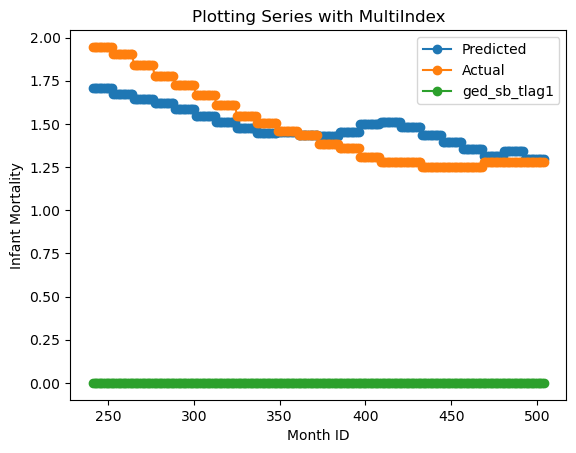

In [31]:
data1.plot_time_series_regression(independent_variable, dependent_variable, 'Fixed Effect',90,'ged_sb_tlag1')

In [25]:
data1.predictions

{'Fixed Effect': month_id  country_id
 241       1             3.708168
           2             3.357210
           3             3.399359
           4             2.965153
           5             3.164240
                           ...   
 504       242           3.769452
           243           3.036603
           244           3.675034
           245           4.062524
           246           4.578569
 Length: 49580, dtype: float64}

In [ ]:
data2

In [ ]:
data2.data

country_name  wdi_sh_dyn_mort_fe  \
month_id country_id                                            
241      1                        Guyana            3.732896   
         2                      Suriname            3.349904   
         3           Trinidad and Tobago            3.277145   
         4                     Venezuela            2.990720   
         5                         Samoa            3.005683   
...                                  ...                 ...   
492      242                    Tanzania            3.832980   
         243                     Morocco            2.879198   
         244                  Mauritania            3.648057   
         245                       Sudan            3.958907   
         246                 South Sudan            4.552824   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
241      1                    21.779484        13.539826      0.000000   
         2                    21.795169        13.079454      0.000000   
         3                    23.309243        14.102345      0.000000   
         4                     0.000000        17.011230      0.000000   
         5                    20.098032        12.122740      0.000000   
...                                 ...              ...           ...   
492      242                  24.842672        17.937868      0.000000   
         243                  25.466157        17.417981      1.098612   
         244                  22.704603        15.319278      0.000000   
         245                  25.120727        17.609661      0.000000   
         246                  23.207989        16.176952      2.484907   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
241      1               0.000000      0.000000      0.000000      0.000000   
         2               0.000000      0.000000      0.000000      0.000000   
         3               0.000000      0.000000      0.000000      0.000000   
         4               0.000000      0.000000      0.000000      0.000000   
         5               0.000000      0.000000      0.000000      0.000000   
...                           ...           ...           ...           ...   
492      242             3.258097      0.000000      0.000000      0.000000   
         243             0.000000      0.000000      0.000000      0.000000   
         244             0.000000      0.000000      0.000000      0.000000   
         245             0.000000      1.386294      1.386294      1.386294   
         246             0.000000      0.693147      3.218876      2.302585   

                     ged_sb_tlag6  ...  ged_sb_tlag28  ged_sb_tlag29  \
month_id country_id                ...                                 
241      1               0.000000  ...       0.000000       0.000000   
         2               0.000000  ...       0.000000       0.000000   
         3               0.000000  ...       0.000000       0.000000   
         4               0.000000  ...       0.000000       0.000000   
         5               0.000000  ...       0.000000       0.000000   
...                           ...  ...            ...            ...   
492      242             0.000000  ...       0.000000       0.000000   
         243             0.000000  ...       0.000000       0.000000   
         244             0.000000  ...       0.000000       0.000000   
         245             3.688879  ...       1.386294       2.944439   
         246             1.386294  ...       2.397895       2.484907   

                     ged_sb_tlag30  ged_sb_tlag31  ged_sb_tlag32  \
month_id country_id                                                
241      1                0.000000       0.000000       0.000000   
         2                0.000000       0.000000       0.00000

In [ ]:
data2.predictions

{'Fixed Effect': month_id  country_id
 241       1             2.930206
           2             2.884478
           3             2.772633
           4             6.330368
           5             3.033534
                           ...   
 492       242           3.449471
           243           3.119008
           244           3.281024
           245           3.651450
           246           3.561023
 Length: 47312, dtype: float64}

month_id  country_id
241       4             2.990720
242       4             2.990720
243       4             2.990720
244       4             2.990720
245       4             2.990720
                          ...   
488       4             3.144152
489       4             3.144152
490       4             3.144152
491       4             3.144152
492       4             3.144152
Name: wdi_sh_dyn_mort_fe, Length: 252, dtype: float64
month_id  country_id
241       4             6.330368
242       4             6.330368
243       4             6.330368
244       4             6.330368
245       4             6.330368
                          ...   
488       4             6.345336
489       4             6.345336
490       4             6.345336
491       4             6.345336
492       4             6.345336
Length: 252, dtype: float64


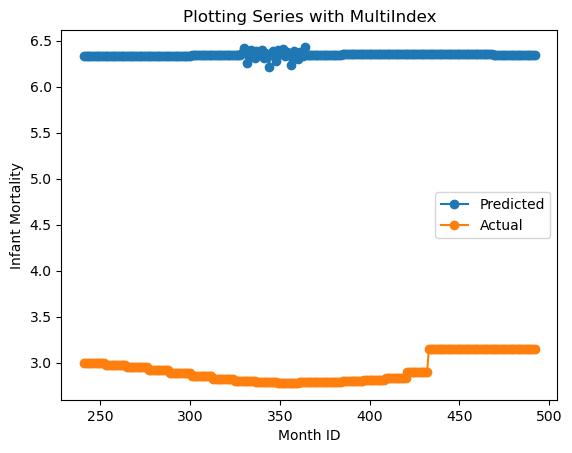

In [ ]:
data2.plot_time_series_regression(independent_variable, dependent_variable, 'Fixed Effect', 4)